### A/B testing target:

to see which version plays better

### A/B testing step:
- Fix some version
- All users are divided into two (or several) groups
- Detect and resolve problems in the data 
     - Missing Value, Outliers, Unexpected Value
- Look summary stats and plots
- Apply hypothesis testing and check assumptions
     - Check Normality & Homogeneity
     - Apply tests 
          - test normality/parametric: Shapiro Test
          - test homogeneity of variances: Levene Test
          - if normality:
               - and if homogeneity of variances:
                    - independent two-sample t-test
               - if not homogeneity of variances:
                    - Welch Test
          - if not normality/non-parametric:
               - Mann Whitney U Test
- Evaluate the results/ Measure metric for some period
- Make inferences
- Recommend business decision to your customer/director/ceo etc.

### banner segmemt of online store(CI and p-value)

#### intro:
We are an online store of sports goods: clothing, shoes, accessories and sports nutrition. On the main page of the store we show users banners in order to stimulate their sales. Now one of 5 banners is randomly displayed there. Each banner advertises a specific product or the entire company. Our marketers believe that the experience with banners can vary by segment, and their effectiveness may depend on the characteristics of user behavior.
The manager of the company had an offer from partners to sell this place for a banner and advertise another service there (payment is assumed according to the CPC model).
Help the manager make a decision.

In [20]:
import numpy as np 
import pandas as pd 
import scipy.stats as st
import math

##### data explanation
* order_id - unique purchase number (NA for banner clicks and impressions)
* user_id - unique identifier of the client
* page_id - unique page number for event bundle (NA for purchases)
* product - banner / purchase product
* site_version - version of the site (mobile or desktop)
* time - time of the action
* title - type of event (show, click or purchase)
* target - target class

In [2]:
# read data
# link: https://www.kaggle.com/datasets/podsyp/how-to-do-product-analytics?resource=download
df = pd.read_csv("../data/product.csv", sep=",")
df.head()

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0


##### Assumption: User site version affects user behaviour
* H0 = user site version affects selection
* H1 = User site version doesnt affect selection

confidence level = **0.05** for **95% confidence interval**

practical significance = **0.01**

In [3]:
def abStatistics(n1, n2, prob, alpha, x1,x2,practical_significance, std1, std2):
    SE = math.sqrt(prob * (1-prob) * (1/n1 + 1/n2))
    alpha = st.norm.ppf(1-alpha/2)
    margin_of_error = SE * alpha
    
    mean_diff = x1-x2
    lower_bound = mean_diff-margin_of_error
    upper_bound = mean_diff+margin_of_error
    
    zscore = mean_diff / math.sqrt((math.pow(std1,2)/n1) + (math.pow(std2,2)/n2))
    pvalue = st.norm.sf(abs(zscore))*2
    d = (std1-std2)/SE
    if practical_significance < lower_bound:
        print("Reject null Hypothesis")
    else:
        print ("Accept null Hypothesis")
        
    if pvalue <= alpha:
        print("Reject null Hypothesis, Result is statistical significant")
    else:
        print("Accept Alternate Hypothesis, Result not statistical significant ")

    print(f"Standard Error: {SE}, margin of error: {margin_of_error},\nCI ({lower_bound},{upper_bound})")

In [12]:
df2 = df.groupby(['site_version', 'title']).agg({'target':"sum", 'user_id':"count"}).reset_index()
df2

,site_version,title,target,user_id
0,desktop,banner_click,0,115065
1,desktop,banner_show,0,2134639
2,desktop,order,133181,133181
3,mobile,banner_click,0,714119
4,mobile,banner_show,0,5258675
5,mobile,order,115541,115541


In [15]:
# Compute data for desktop orders
total_desktop = df['target'][df['site_version'] == "desktop"].count()
total_desktop_order = df['target'][(df['site_version'] == "desktop") & (df['title'] == "order")].sum()
mean_desktop_order = total_desktop_order/total_desktop
std_desktop_order = df['target'][df['site_version'] == "desktop"].std()

In [16]:
# Compute data for mobile orders
total_mobile = df['target'][df['site_version'] == "mobile"].count()
total_mobile_order = df['target'][(df['site_version']=="mobile")&(df['title']=="order")].sum()
mean_mobile_order = total_mobile_order/total_mobile
std_mobile_order = df['target'][df['site_version'] == "mobile"].std()

In [6]:
# Probability of Order
prob = (total_desktop_order+total_mobile_order)/ (total_mobile + total_desktop)
prob

0.029360824060761025

In [19]:
# Calculate the statistics
alpha = 0.05 #95%  confidence level
pratical_sig = 0.01
abStatistics(total_desktop, total_mobile, prob, alpha, mean_desktop_order,mean_mobile_order,pratical_sig, std_desktop_order, std_mobile_order)

Reject null Hypothesis
Reject null Hypothesis, Result is statistical significant
Standard Error: 0.00012899865925454382, margin of error: 0.00025283272619286044,
CI (0.0366603828279715,0.03716604828035722)


### Marketing A/B Testing(p-value)

#### intro:
The companies are interested in answering two questions:

Would the campaign be successful?
If the campaign was successful, how much of that success could be attributed to the ads?
With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random

##### data explanation
* Index: Row index
* user id: User ID (unique)
* test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
* converted: If a person bought the product then True, else is False
* total ads: Amount of ads seen by person
* most ads day: Day that the person saw the biggest amount of ads
* most ads hour: Hour of day that the person saw the biggest amount of ads

##### load and primary exploration

In [2]:
df = pd.read_csv("../data/marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [7]:
df.describe(include="all")

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
count,588101.000000,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,NaN,2,2,NaN,7,NaN
top,NaN,NaN,ad,False,NaN,Friday,NaN
freq,NaN,NaN,564577,573258,NaN,92608,NaN
mean,294050.000000,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,169770.279667,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,0.000000,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,147025.000000,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,294050.000000,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,441075.000000,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


In [8]:
# data cleaning
df = df.drop(["Unnamed: 0"],axis =1)
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [9]:
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df.head(1)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20


In [11]:
# check duplicate
df.duplicated().unique()

array([False])

In [14]:
# check unique values
df.nunique()

user_id          588101
test_group            2
converted             2
total_ads           807
most_ads_day          7
most_ads_hour        24
dtype: int64

In [15]:
# check missing value
# df.isnull().values.sum()
df.isnull().any()

user_id          False
test_group       False
converted        False
total_ads        False
most_ads_day     False
most_ads_hour    False
dtype: bool

In [17]:
# new col
df["converted_int"] = df['converted'].apply(lambda x:1 if x== True  else  0)
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour,converted_int
0,1069124,ad,False,130,Monday,20,0
1,1119715,ad,False,93,Tuesday,22,0
2,1144181,ad,False,21,Tuesday,18,0
3,1435133,ad,False,355,Tuesday,10,0
4,1015700,ad,False,276,Friday,14,0


##### EDA

In [26]:
def val_count(column):
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=column)
    plt.title(f'Value Count - {column}')
    plt.show()

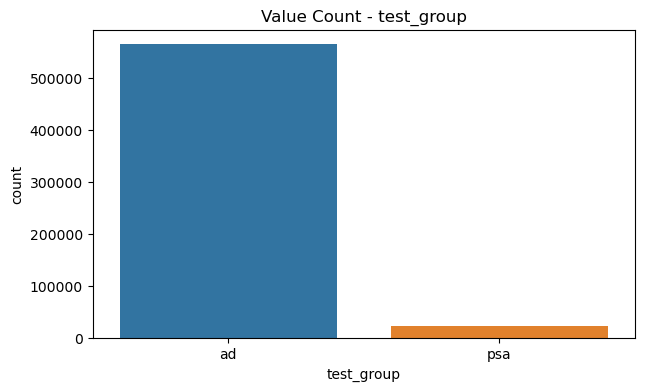

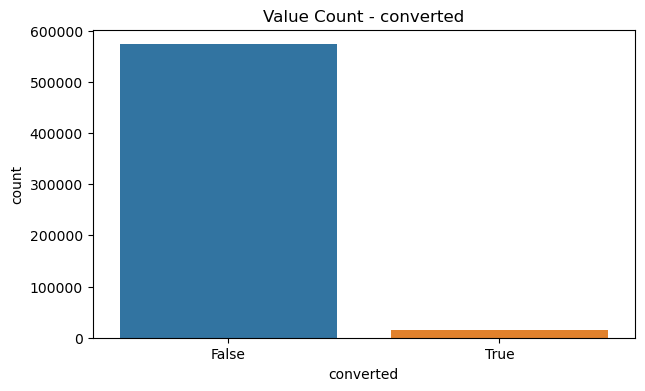

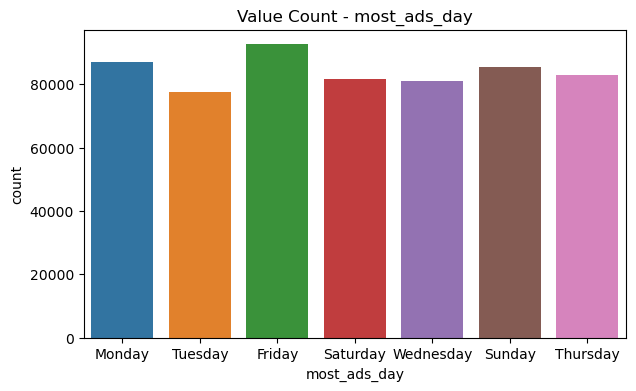

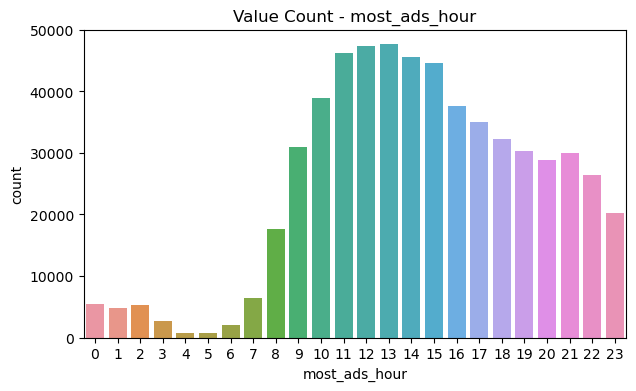

In [27]:
#create columns of interest
col_lst = df.columns[[1,2,4,5]]

#loop through columns of interest
for i in col_lst:
    val_count(i)

peek hour: 10-16

In [28]:
grouped_counts = df.groupby('test_group')['converted'].value_counts()
grouped_counts

test_group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: count, dtype: int64

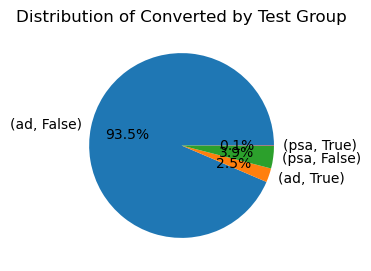

In [29]:
# Plot the data as a pie chart
grouped_counts.plot.pie(figsize= (3,3),autopct='%1.1f%%')

# Set the title and axis labels
plt.title('Distribution of Converted by Test Group')
plt.ylabel('')

# Show the plot
plt.show()

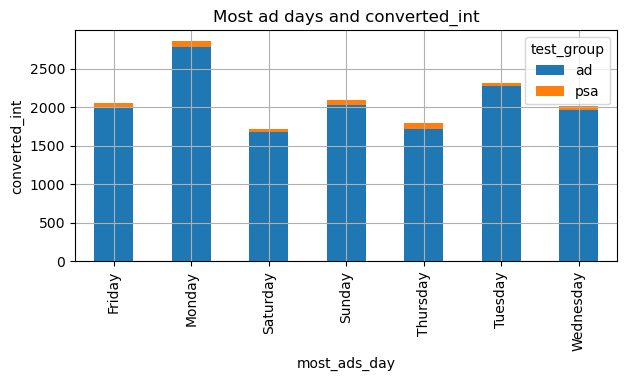

In [34]:
ax =df.groupby(by =['most_ads_day','test_group']).sum()['converted_int'].\
    unstack('test_group').plot(kind='bar',figsize=(7,3),grid=True,stacked=True)
ax.set_ylabel('converted_int')
ax.set_title('Most ad days and converted_int')
plt.show()

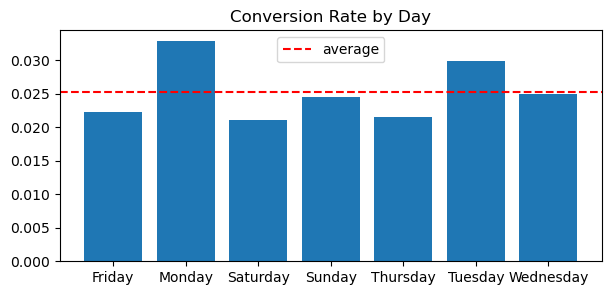

In [32]:
#visualize conversion by day
df_day_conv = pd.DataFrame(df.groupby('most_ads_day')['converted'].mean())
df_day_conv.reset_index(inplace=True)

plt.figure(figsize=(7,3))
plt.bar(data=df_day_conv, x='most_ads_day', height='converted')
plt.title('Conversion Rate by Day')
plt.axhline(df['converted'].mean(), color='r', linestyle='--', label='average')
plt.legend()
plt.show()

##### Ab testing

In [35]:
import math

def sample_size_calculator(population_size,confidence_level,margin_of_error):
    z_score = {
        0.90: 1.645,
        0.95: 1.96,
        0.99: 2.576
    }
    
    z = z_score[confidence_level]
    p = 0.5 # assuming 50% for a conservative estimate of the sample size
    q = 1 - p
    
    sample_size = ((z**2)*p*q*population_size)/((z**2*q)+((margin_of_error**2)*(population_size-1)))
    return math.ceil(sample_size)

In [36]:
#compute sample size 
pop_size = df.shape[0]
conf_level = 0.99
margin_err = 0.03

sample_size = sample_size_calculator(pop_size, conf_level, margin_err)
print(f"The population size is :{pop_size} \nThe required sample size is: {sample_size}")

The population size is :588101 
The required sample size is: 1832


In [38]:
treatment = df.query('test_group == "ad"')
control = df.query('test_group == "psa"')
df.converted.mean() *100

2.523886203220195

In [39]:
control["converted"].mean()

0.01785410644448223

In [40]:
treatment["converted"].mean()

0.025546559636683747

mean of converted in treatment group is more than control group which make the hypothsis of ad has positive effect on conversion

(array([  1.,   3.,   2.,   2.,   0.,   4.,  11.,  20.,  24.,  39.,  53.,
         72.,  93., 144., 133., 181., 256., 311., 351., 388., 425., 518.,
        549., 619., 564., 582., 583., 545., 548., 501., 450., 422., 374.,
        262., 212., 193., 139., 137.,  80.,  67.,  39.,  36.,  25.,  14.,
          8.,   3.,   6.,   6.,   3.,   2.]),
 array([0.02443422, 0.02446589, 0.02449756, 0.02452923, 0.0245609 ,
        0.02459257, 0.02462424, 0.02465591, 0.02468758, 0.02471925,
        0.02475092, 0.02478259, 0.02481426, 0.02484593, 0.0248776 ,
        0.02490927, 0.02494094, 0.02497261, 0.02500428, 0.02503595,
        0.02506762, 0.02509929, 0.02513096, 0.02516263, 0.0251943 ,
        0.02522597, 0.02525764, 0.02528931, 0.02532097, 0.02535264,
        0.02538431, 0.02541598, 0.02544765, 0.02547932, 0.02551099,
        0.02554266, 0.02557433, 0.025606  , 0.02563767, 0.02566934,
        0.02570101, 0.02573268, 0.02576435, 0.02579602, 0.02582769,
        0.02585936, 0.02589103, 0.0259227 , 0.

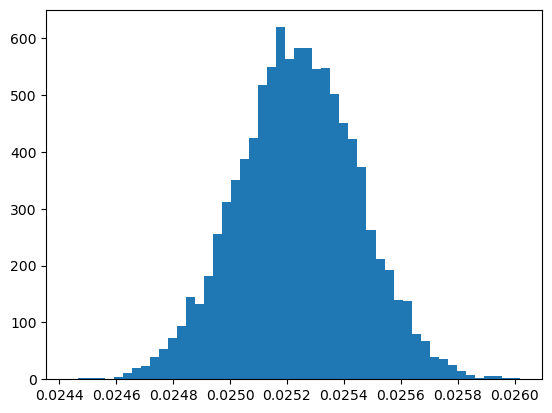

In [41]:
ad_converted = np.random.binomial(len(treatment),df.converted.mean(),10000)/len(treatment)
plt.hist(ad_converted, bins=50)

(array([  2.,   0.,   1.,   3.,   9.,   8.,   7.,  30.,  25.,  46.,  60.,
         58., 105., 105., 139., 211., 220., 361., 276., 355., 501., 402.,
        635., 504., 540., 631., 488., 628., 436., 431., 509., 375., 426.,
        268., 232., 260., 164., 170.,  81.,  74.,  77.,  33.,  40.,  27.,
         21.,   9.,   9.,   4.,   2.,   2.]),
 array([0.02150995, 0.02165448, 0.02179901, 0.02194355, 0.02208808,
        0.02223261, 0.02237715, 0.02252168, 0.02266621, 0.02281075,
        0.02295528, 0.02309981, 0.02324435, 0.02338888, 0.02353341,
        0.02367795, 0.02382248, 0.02396701, 0.02411155, 0.02425608,
        0.02440061, 0.02454515, 0.02468968, 0.02483421, 0.02497875,
        0.02512328, 0.02526781, 0.02541234, 0.02555688, 0.02570141,
        0.02584594, 0.02599048, 0.02613501, 0.02627954, 0.02642408,
        0.02656861, 0.02671314, 0.02685768, 0.02700221, 0.02714674,
        0.02729128, 0.02743581, 0.02758034, 0.02772488, 0.02786941,
        0.02801394, 0.02815848, 0.02830301, 0.

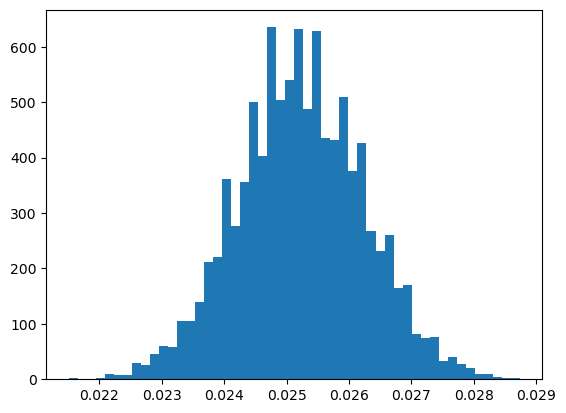

In [42]:
psa_converted = np.random.binomial(len(control),df.converted.mean(),10000)/len(control)
plt.hist(psa_converted, bins=50 ,align = 'mid' , data=None)

In [43]:
p_diffs = ad_converted - psa_converted
p_diffs
p_diffs.mean()

1.3942252378780095e-05

In [44]:
#real diff
# customer who is shown ads bought less
ab_data_diff = treatment['converted'].mean() - control['converted'].mean()
ab_data_diff


0.007692453192201517

Does showing ads to people lead to more purchases? Is this statistically significant or not? 

H0: Showing ads has no significant effect on the number of purchases. 

H1: Showing ads has a significant effect on the number of purchases.

In [45]:
# is buying less is 
if ab_data_diff > 0 : 
    p_value = (p_diffs > ab_data_diff).mean() * 100
else :
    p_value = (p_diffs <= ab_data_diff).mean() * 100
print ( "p_value = " ,p_value)
if p_value < 0.05:
    print( 'Reject the null hypothesis. There is a significant difference between the two groups.')
else:
    print( 'Fail to reject the null hypothesis. There is no significant difference between the two groups.')

p_value =  0.0
Reject the null hypothesis. There is a significant difference between the two groups.


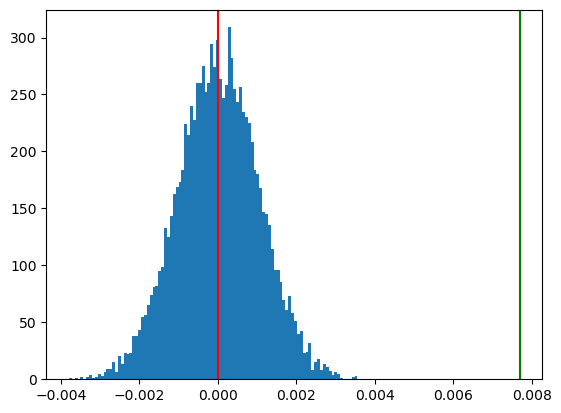

In [46]:
plt.hist(p_diffs, bins=100)
low = ab_data_diff
higth = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r')

### Mobile Games A/B Testing with Cookie Cats
#### (using package)

#### intro:
As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# import os
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

##### data explanation
* userid - a unique number that identifies each player.
* version - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
* sum_gamerounds - the number of game rounds played by the player during the first week after installation
* retention_1 - did the player come back and play 1 day after installing?
* retention_7 - did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

In [2]:
df = pd.read_csv("../data/cookie_cats.csv")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
# check unique user
df.userid.nunique(),df.shape[0]

(90189, 90189)

In [6]:
df.groupby("version")["sum_gamerounds"].\
        agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0,52.456264,256.716423,49854
gate_40,45489,16.0,51.298776,103.294416,2640


##### plt

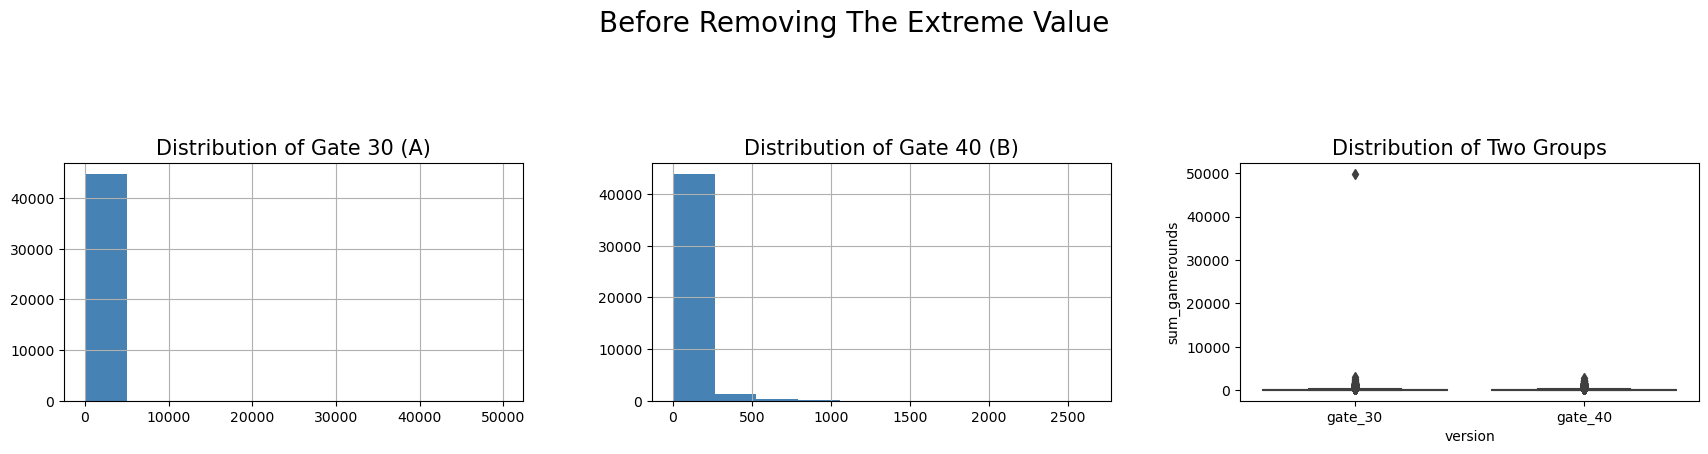

In [7]:
# plt
fig, axes = plt.subplots(1, 3, figsize = (18,5))
df[(df["version"] == "gate_30")].hist("sum_gamerounds", ax = axes[0], color = "steelblue")
df[(df["version"] == "gate_40")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
sns.boxplot(x = df["version"], y = df["sum_gamerounds"], ax = axes[2])

plt.suptitle("Before Removing The Extreme Value", fontsize = 20)
axes[0].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[1].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[2].set_title("Distribution of Two Groups", fontsize = 15)

plt.tight_layout(pad = 4)

Text(0.5, 0.98, 'Before Removing The Extreme Value')

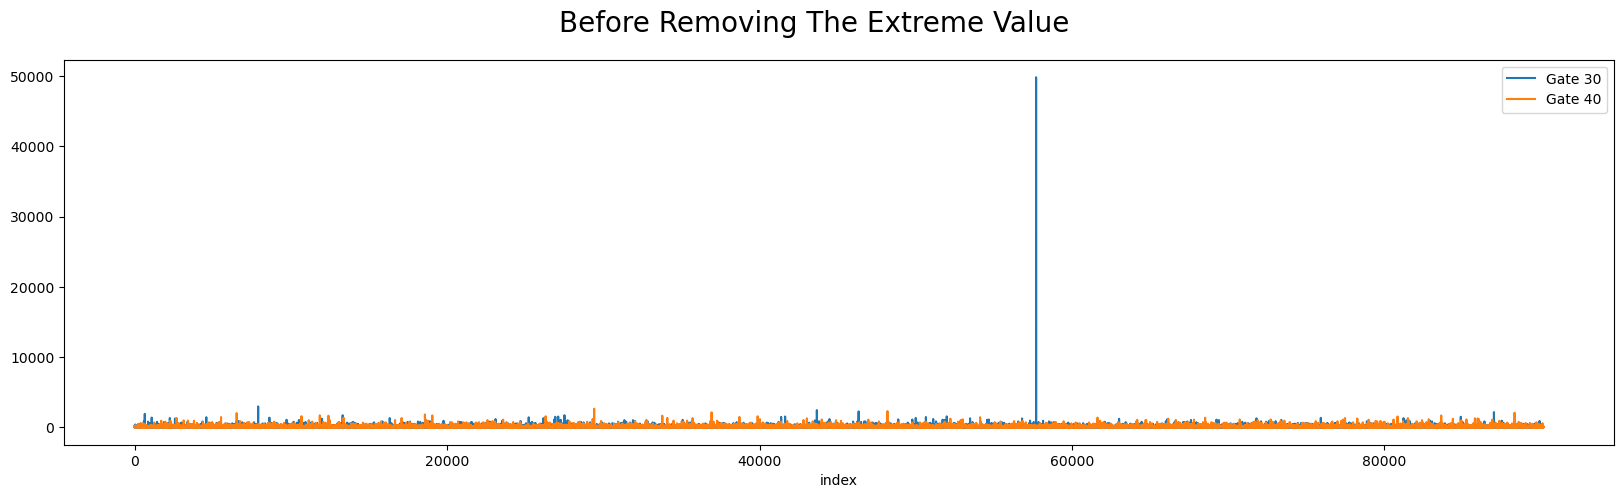

In [8]:
df[(df["version"] == "gate_30")].reset_index().set_index("index")["sum_gamerounds"].\
    plot(legend = True, label = "Gate 30", figsize = (20,5))
df[(df["version"] == "gate_40")].reset_index().set_index("index")["sum_gamerounds"].\
    plot(legend = True, label = "Gate 40")
plt.suptitle("Before Removing The Extreme Value", fontsize = 20)

##### outliers

In [ ]:
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]]

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
1%,0.000000
5%,1.000000
10%,1.000000
20%,3.000000
50%,16.000000
80%,67.000000


In [9]:
# from above, we can see there is outliers
# try to remove the max
df1 = df[df["sum_gamerounds"] < df["sum_gamerounds"].max()]

# Summary Stats: sum_gamerounds
df1.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0,51.320253,102.682719,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,2961.0


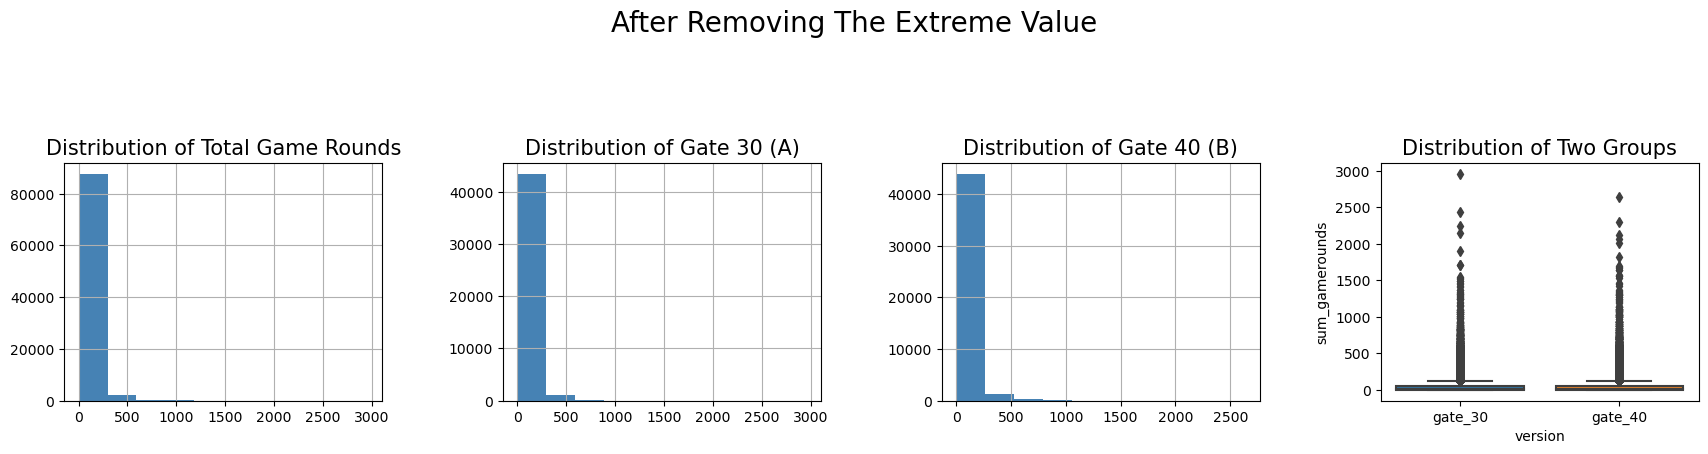

In [10]:
# plt
fig, axes = plt.subplots(1,4, figsize = (18,5))
df1["sum_gamerounds"].hist(ax = axes[0], color = "steelblue")
df1[(df1["version"] == "gate_30")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
df1[(df1["version"] == "gate_40")].hist("sum_gamerounds", ax = axes[2], color = "steelblue")
sns.boxplot(x = df1["version"], y = df1["sum_gamerounds"], ax = axes[3])

plt.suptitle("After Removing The Extreme Value", fontsize = 20)
axes[0].set_title("Distribution of Total Game Rounds", fontsize = 15)
axes[1].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[2].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[3].set_title("Distribution of Two Groups", fontsize = 15)

plt.tight_layout(pad = 4)

Text(0.5, 0.98, 'After Removing The Extreme Value')

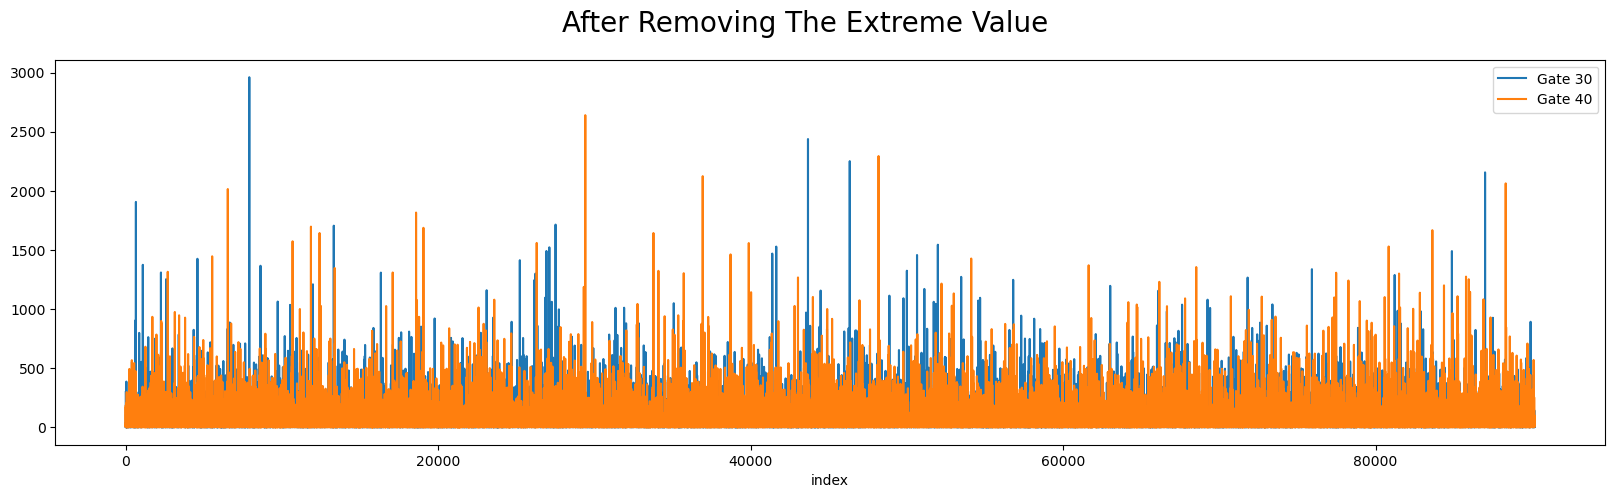

In [11]:
df1[(df1["version"] == "gate_30")].reset_index().set_index("index")["sum_gamerounds"].\
    plot(legend = True, label = "Gate 30", figsize = (20,5))
df1[(df1["version"] == "gate_40")].reset_index().set_index("index")["sum_gamerounds"].\
    plot(legend = True, label = "Gate 40")
plt.suptitle("After Removing The Extreme Value", fontsize = 20)

##### some findings
- the number of users decreases as the levels progress

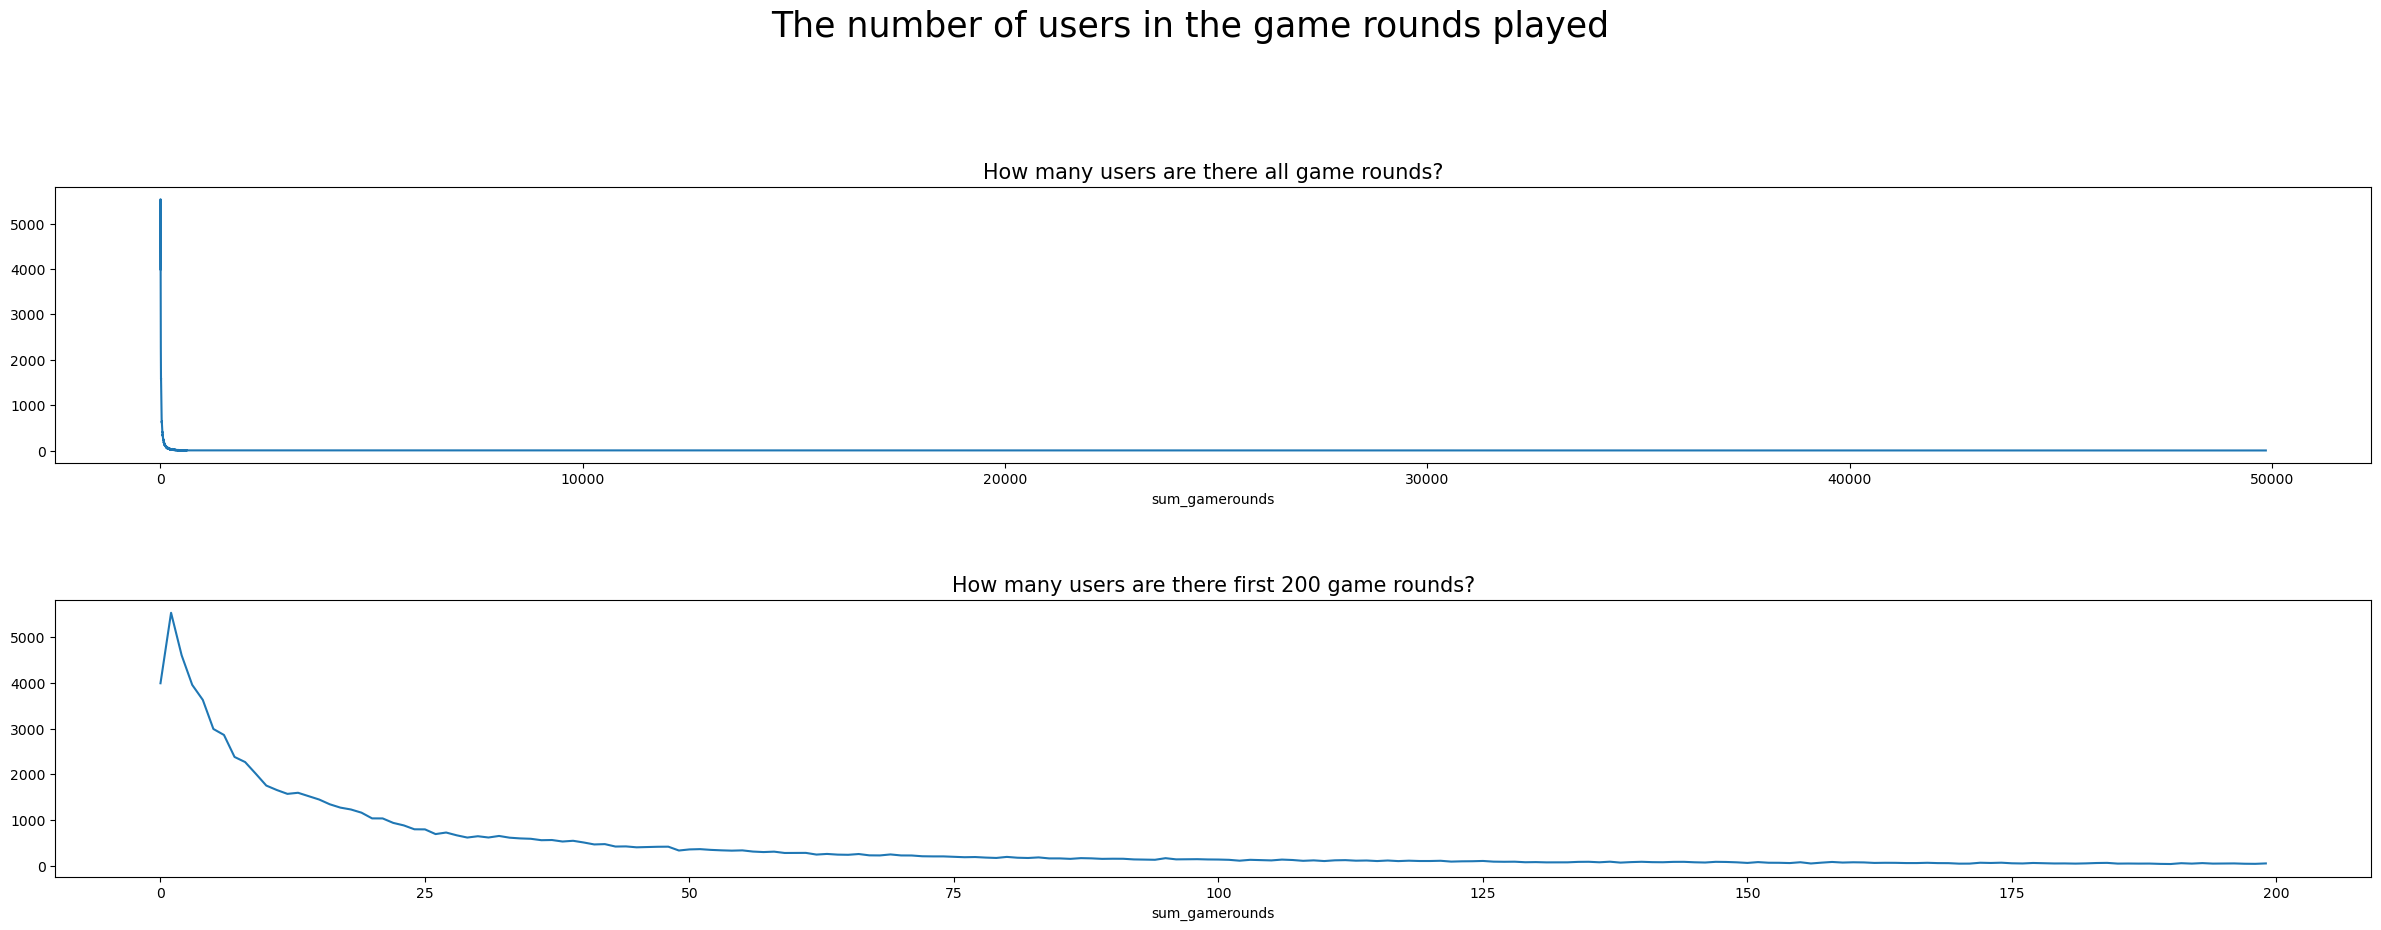

In [17]:
fig, axes = plt.subplots(2, 1, figsize = (25,10))
df.groupby("sum_gamerounds")["userid"].count().plot(ax=axes[0])
df.groupby("sum_gamerounds")["userid"].count()[:200].plot(ax=axes[1])
plt.suptitle("The number of users in the game rounds played", fontsize = 25)
axes[0].set_title("How many users are there all game rounds?", fontsize = 15)
axes[1].set_title("How many users are there first 200 game rounds?", fontsize = 15)
plt.tight_layout(pad=5)

##### A/B testing

In [19]:
# define group
df["version"] = np.where(df["version"] == "gate_30", "A", "B")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,False,False
1,337,A,38,True,False
2,377,B,165,True,False
3,483,B,1,False,False
4,488,B,179,True,True


In [20]:
# def AB tesing func
from scipy.stats import shapiro
import scipy.stats as stats
def AB_Test(dataframe, group, target):
    # Split A/B
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]
    
    # Assumption: Normality
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05

    # False: H0: Distribution is Normal!
    # True:  H1: Distribution is not Normal!
    if (ntA == False) & (ntB == False): #don't reject H0, "H0: Normal Distribution"
        # Parametric Test, Assumption: Homogeneity of variances
        # False: H0: Homogeneity
        # True:  H1: Heterogeneous
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05

        if leveneTest == False: # Homogeneity
            # False: H0: M1 == M2, Homogeneity 
            # True:  H1: M1 != M2, Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
        else: # Heterogeneous
            # False: H0: M1 == M2, Homogeneity 
            # True:  H1: M1 != M2, Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
    else: # Non-Parametric Test
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True
        ttest = stats.mannwhitneyu(groupA, groupB)[1] 
        
    temp = pd.DataFrame({"AB Hypothesis":[ttest < 0.05], "p-value":[ttest]})
    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")

    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]
    
    # Print Hypothesis
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")

    return temp

In [21]:
AB_Test(dataframe=df, group = "version", target = "sum_gamerounds")

# A/B Testing Hypothesis
H0: A == B
H1: A != B 



,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Reject H0,0.025104,A/B groups are not similar!


### A/B Testing on Grocery Website Data

#### intro:
observe whether a change made in the web interface of a market increases the number of clicks

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,\
    pearsonr, spearmanr, kendalltau,f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

##### data


In [12]:
df = pd.read_csv("../data/grocery_website_data.csv")
df.head()

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag
0,1,39.13.114.2,1,2,0
1,2,13.3.25.8,1,1,0
2,3,247.8.211.8,1,1,0
3,4,124.8.220.3,0,3,0
4,5,60.10.192.7,0,2,0


In [19]:
# aggregate VisitPageFlag
df1 = df.groupby(["IP Address","LoggedInFlag","ServerID"])["VisitPageFlag"].sum()
df1 = df1.reset_index(name="VisitPageFlagSum")
df1["VisitPageFlag"] = df1["VisitPageFlagSum"].apply(lambda x: 1 if x!=0 else 0)
df1.head()

,IP Address,LoggedInFlag,ServerID,VisitPageFlagSum,VisitPageFlag
0,0.0.108.2,0,1,0,0
1,0.0.109.6,1,1,0,0
2,0.0.111.8,0,3,0,0
3,0.0.160.9,1,2,0,0
4,0.0.163.1,0,2,0,0


In [35]:
# split group according to ServerID
# 1 as Test group, 2 and 3 as Control group
df1["group"] = df1["ServerID"].map({1:'Test', 2:'Control', 3:'Control'})
df1 = df1.drop(["VisitPageFlagSum","ServerID"],axis=1)
df1.head()

,IP Address,LoggedInFlag,VisitPageFlag,group
0,0.0.108.2,0,0,Test
1,0.0.109.6,1,0,Test
2,0.0.111.8,0,0,Control
3,0.0.160.9,1,0,Control
4,0.0.163.1,0,0,Control


In [42]:
df_control = df1[df1["group"]=="Control"]
df_control.reset_index(inplace=True, drop = True)
df_test = df1[df1["group"]=="Test"]
df_test.reset_index(inplace=True, drop = True)

In [47]:
# calculate the ratio of those who enter the page we want/all those who enter the site
control_visit_site = df_control['VisitPageFlag'].count()
control_visit_page = df_control["VisitPageFlag"].sum()
control_visit_ratio = control_visit_page/control_visit_site
control_visit_ratio

0.09225097803189888

In [48]:
# for test group
test_visit_site = df_test['VisitPageFlag'].count()
test_visit_page = df_test["VisitPageFlag"].sum()
test_visit_ratio = test_visit_page/test_visit_site
test_visit_ratio

0.11551511875806984

##### AB testing

In [50]:
# check normality
# H0 : normality is provided.
# H1 : normality is not provided.

test_stat, p_value = shapiro(df_control["VisitPageFlag"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, p_value))
test_stat, p_value = shapiro(df_test["VisitPageFlag"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, p_value))

# p-value<alpha=0.05, so rejected H0, 
# meaning that the assumption of normality is not provided
# so do  Mann-Whitney U test

Test Stat = 0.3266, p-value = 0.0000
Test Stat = 0.3711, p-value = 0.0000


In [51]:
# Mann-Whitney U test
# H0 : There is no significant difference between the two groups   
    # in terms of click rate to the desired page.
# H1 : There is a difference

test_stat, pvalue = mannwhitneyu(df_control["VisitPageFlag"], df_test["VisitPageFlag"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, p_value))

# p-value<alpha=0.05, so rejected H0, 
# meaning that There is a difference btw two groups

Test Stat = 1080913226.5000, p-value = 0.0000


In [53]:
group_count = df1.groupby(['group', 'VisitPageFlag'])['group'].count().reset_index(name='Count')
groupped = pd.crosstab(group_count['group'], group_count['VisitPageFlag'], values=group_count['Count'], aggfunc=np.sum, margins=True)
100*groupped.div(groupped['All'], axis=0)

VisitPageFlag,0,1,All
group,,,
Control,90.774902,9.225098,100.0
Test,88.448488,11.551512,100.0
All,89.998296,10.001704,100.0
